In [7]:
!pip install wikipedia

import wikipedia
# use .summary instead of .content for just the summary text.
data = wikipedia.page("Data Science").content
data += wikipedia.page("Natural Language Processing").content
data += wikipedia.page("Artificial Intelligence").content
data += wikipedia.page("Machine Learning (ML)").content
data += wikipedia.page("Machine Translation").content
data += wikipedia.page("Deep Learning").content
data += wikipedia.page("Chatterbot").content
data += wikipedia.page("Data Analysis").content
data += wikipedia.page("Time Series").content
data += wikipedia.page("Supervised Learning").content




In [8]:
from nltk import tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# Remove small sentences
lines = tokenize.sent_tokenize(data)
lines = [i for i in lines if len(i.strip())>5]

# for words not found in index
tokenizer = Tokenizer(oov_token='<oov>') 
tokenizer.fit_on_texts(lines)
total_words = len(tokenizer.word_index) + 1

In [12]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_seq_len = 10
input_sequences = []

for line in lines:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, min(max_seq_len, len(tokens))):
        ngram_seq = tokens[: i+1]
        input_sequences.append(ngram_seq)
print(f"{len(input_sequences)=}")

max_len = max([len(i) for i in input_sequences])
print(f"{max_len=}")

input_sequences = np.array(
    pad_sequences(
        input_sequences, maxlen=max_len, padding='pre'
    )
)

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = to_categorical(
    labels, num_classes=total_words
)

len(input_sequences)=17729
max_len=10


In [18]:
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Bidirectional
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(
    total_words, 100, input_length=max_len-1)
)
model.add(Bidirectional(LSTM(64)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(
    loss='categorical_crossentropy',
    optimizer=adam, metrics=['accuracy']
)
history = model.fit(xs, ys, epochs=40, verbose=1)

Epoch 1/40
555/555 [==============================] - 12s 18ms/step - loss: 6.9923 - accuracy: 0.0715
Epoch 2/40
555/555 [==============================] - 11s 19ms/step - loss: 5.8978 - accuracy: 0.1336
Epoch 3/40
555/555 [==============================] - 11s 20ms/step - loss: 5.0262 - accuracy: 0.1781
Epoch 4/40
555/555 [==============================] - 11s 20ms/step - loss: 4.1854 - accuracy: 0.2386
Epoch 5/40
555/555 [==============================] - 11s 19ms/step - loss: 3.4173 - accuracy: 0.3237
Epoch 6/40
555/555 [==============================] - 10s 19ms/step - loss: 2.7879 - accuracy: 0.4136
Epoch 7/40
555/555 [==============================] - 11s 19ms/step - loss: 2.2961 - accuracy: 0.4942
Epoch 8/40
555/555 [==============================] - 10s 18ms/step - loss: 1.9672 - accuracy: 0.5515
Epoch 9/40
555/555 [==============================] - 10s 19ms/step - loss: 1.6977 - accuracy: 0.6056
Epoch 10/40
555/555 [==============================] - 10s 19ms/step - loss: 1.515

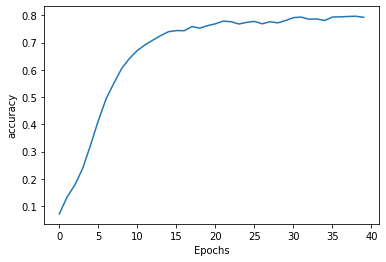

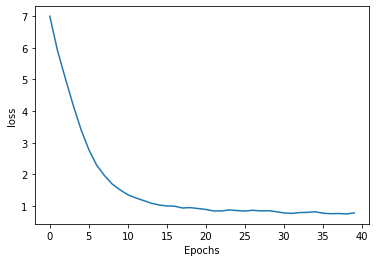

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

In [20]:
def predict_nw(text, next_words=2):
    words = [text]
    for _ in range(next_words):
        full_text = " ".join(words)
        token_list = tokenizer.texts_to_sequences(
            [full_text]
        )[0]
        token_list = pad_sequences(
            [token_list], maxlen=max_len-1, padding='pre'
        )
        predicted = np.argmax(model.predict(
            token_list, verbose=0
        ), axis=-1)
        next_word = ""
        for word, inx in tokenizer.word_index.items():
            if inx == predicted:
                next_word = word
                break
        words.append(next_word)
    
    return " ".join(
        [words[0]] + [
            "".join(["\033[1m", w, "\033[0m"])# to bold the predictions
            for w in words[1:]
        ]
    )

In [32]:
print(predict_nw("neural", next_words=1))
print(predict_nw("machine", next_words=1))
print(predict_nw("language", next_words=9))
print(predict_nw("natural", next_words=2))
print(predict_nw("deep", next_words=1))
print(predict_nw("language model is", next_words=2))
print(predict_nw("nlp", next_words=7))
print(predict_nw("processing data to", next_words=4))

neural networks
machine learning
language models learned from data to context results in contain
natural language processing
deep learning
language model is the continuous
nlp powered document ai enables non linear classification
processing data to rank when analysts perform
